# Carto Le Grand Débat

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os

from descartes import PolygonPatch
from sklearn.preprocessing import MinMaxScaler
import json 
import scipy as sp
from scipy.sparse import linalg
from shapely.geometry import asShape # manipulating geometry
from matplotlib.patches import Patch
from matplotlib.colors import to_rgb

In [113]:
if os.getenv("HOME")=="/home/louis":
    data_folder = "/home/louis/Documents/Data_science/YJ_PROJECT/Data/Data/"
else:
    data_folder = "/Users/veillonpaul-armand/Documents/Projets/Data/"

## Load data

In [114]:
properties = pd.read_csv(data_folder+'Carto/GN_conso_dep_level.csv',sep=";")
properties['DEP']=properties['DEP'].astype(str).str.zfill(2)
properties.loc[properties['DEP'].isin(["20"]), 'DEP']=["2A","2B"]



In [115]:
with open(data_folder+"Carto/departements-version-simplifiee.geojson") as geojson_file:
    geojson_data = json.load(geojson_file) # or geojson.load(json_file)

#delete the name for 75 92 for clarity
geojson_data["features"][75]['properties']['nom']=""
geojson_data["features"][92]['properties']['nom']=""
geojson_data["features"][94]['properties']['nom']=""

## Function for plotting map

In [116]:
def add_property(geojson_data,properties,prop,k):
    n =len(geojson_data["features"])
    
    properties[prop+"_norm"]=pd.cut(properties[prop],k,labels=False)
    properties[prop+"_leg"]=pd.qcut(properties[prop],k)

    for i in range(n):
        try:
            geojson_data["features"][i]['properties'][prop]=properties.loc[properties.DEP==geojson_data["features"][i]['properties']['code'],prop+"_norm"].tolist()[0]
            geojson_data["features"][i]['properties'][prop+"_leg"]=properties.loc[properties.DEP==geojson_data["features"][i]['properties']['code'],prop+"_leg"].tolist()[0]
        except:
            print('error for '+str(i))
    return geojson_data
  

In [167]:
# we plot the map with Descarte package


def plot_map(geojson_data,properties,n):

    fig = plt.figure(figsize=(12,12)) # create a figure to contain the plot elements
    ax = fig.gca(xlabel="Longitude", ylabel="Latitude")
    dic_color ={}

    for feat in geojson_data["features"]:
        try:
            R = 1-(float(feat["properties"][properties])/float(n))
            G = (0.8-float(feat["properties"][properties])/float(n+4))
            B = (0.8-float(feat["properties"][properties])/float(n+4))
            if feat["properties"][properties+"_leg"] not in dic_color.keys():
                dic_color[feat["properties"][properties+"_leg"]]=(R,G,B,0.5)
        except:
            R=1
            G=1
            B=1
        
        # convert the geometry to shapely
        geom = asShape(feat["geometry"])
        # obtain the coordinates of the feature's centroid
        x, y = geom.centroid.x, geom.centroid.y
        # plot the centroids
        ax.plot(x, y, 'ro')
        ax.text(x, y, feat["properties"]["nom"], fontsize=10)
        # plot the polygon features: type help(PolygonPatch) for more args
        ax.add_patch(PolygonPatch(feat["geometry"], facecolor=[R,G,B], ec='white',
                    alpha=1, lw=0.8, ls='--', zorder=1))
    legend_elements = [Patch(facecolor=v,label=k) for k,v in sorted(dic_color.items(), key=lambda  item: (item[1]))]
    ax.legend(handles=legend_elements, loc='upper right',fontsize=12)

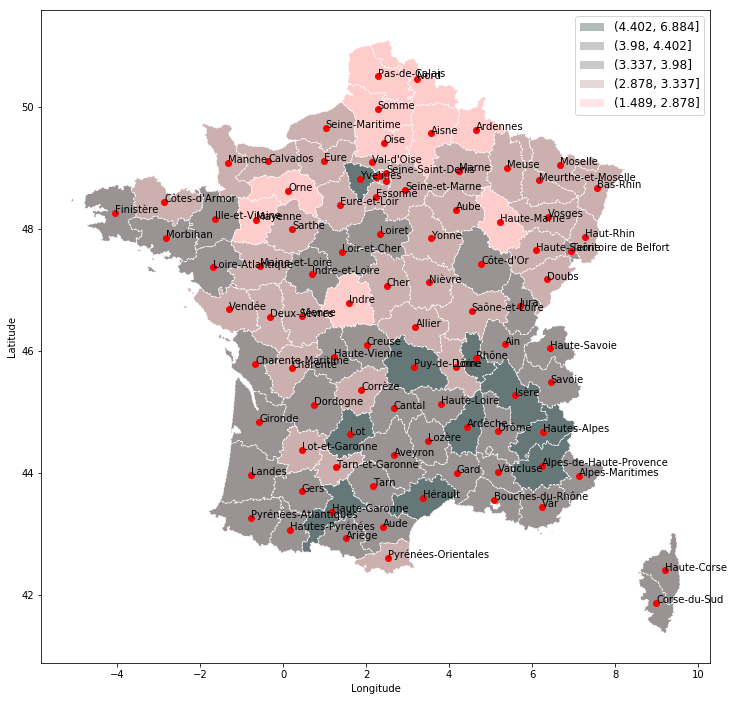

In [168]:
geojson_data=add_property(geojson_data=geojson_data,properties=properties,prop="Count_pourmil",k=5)
plot_map(geojson_data,"Count_pourmil",5)


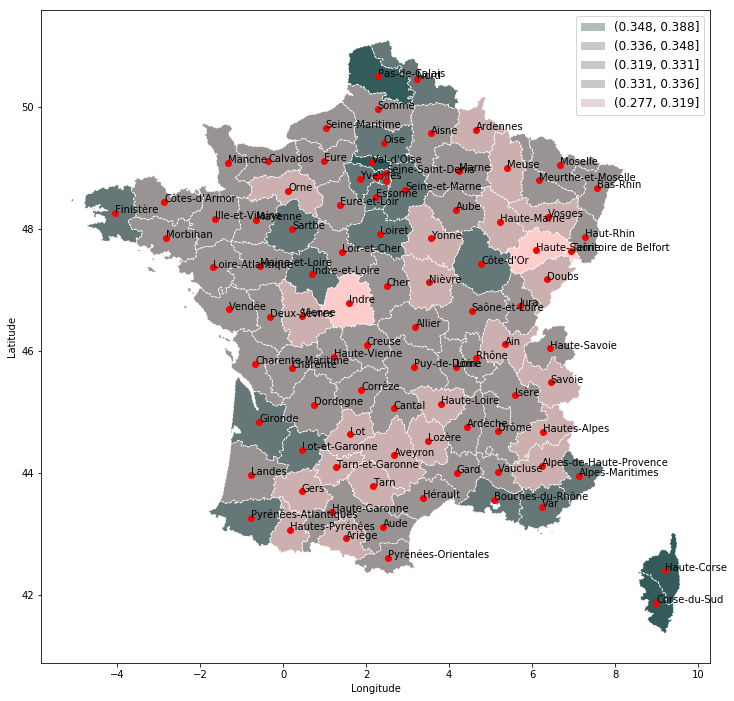

In [172]:
geojson_data=add_property(geojson_data=geojson_data,properties=properties,prop="perc_fisca",k=5)
plot_map(geojson_data,"perc_fisca",5)

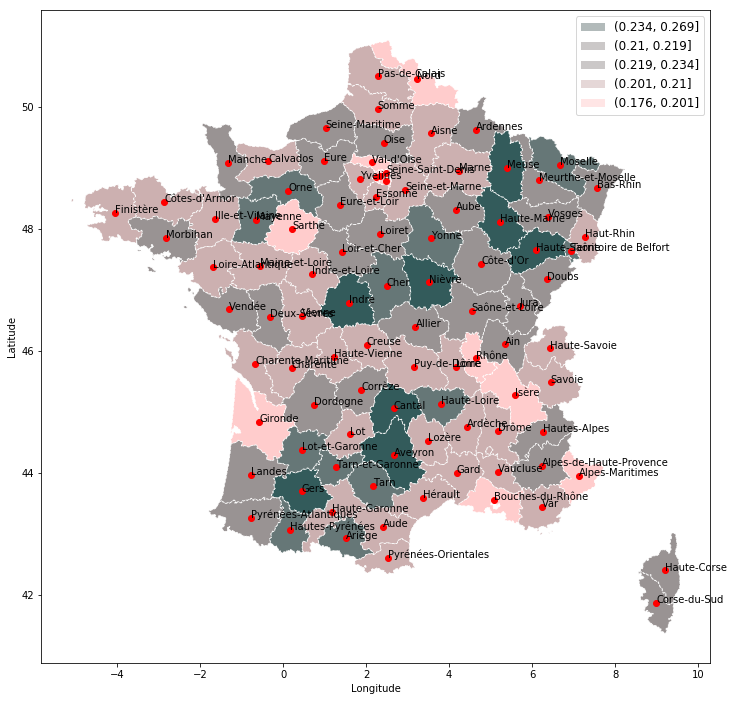

In [169]:
geojson_data=add_property(geojson_data=geojson_data,properties=properties,prop="perc_etat",k=5)
plot_map(geojson_data,"perc_etat",5)

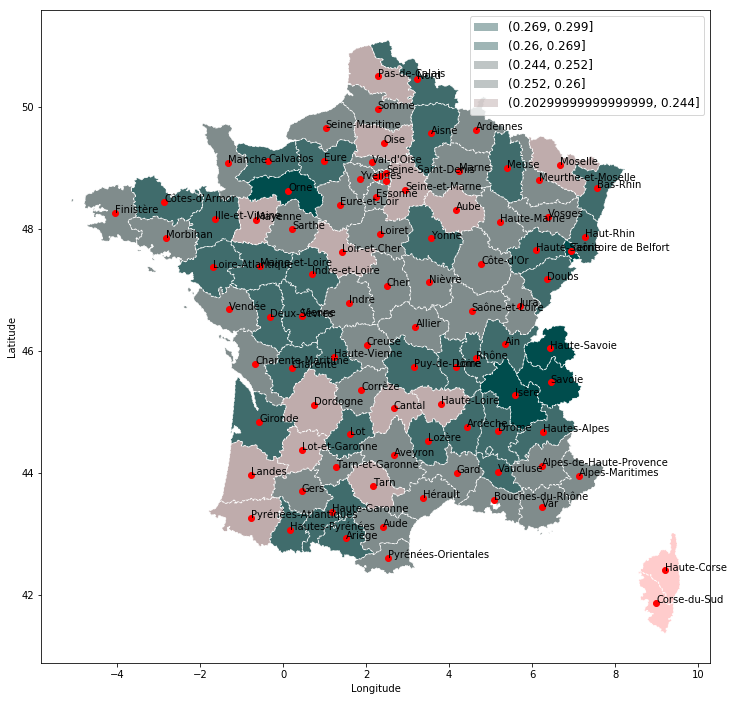

In [170]:
geojson_data=add_property(geojson_data=geojson_data,properties=properties,prop="perc_ecolo",k=5)
plot_map(geojson_data,"perc_ecolo",4)


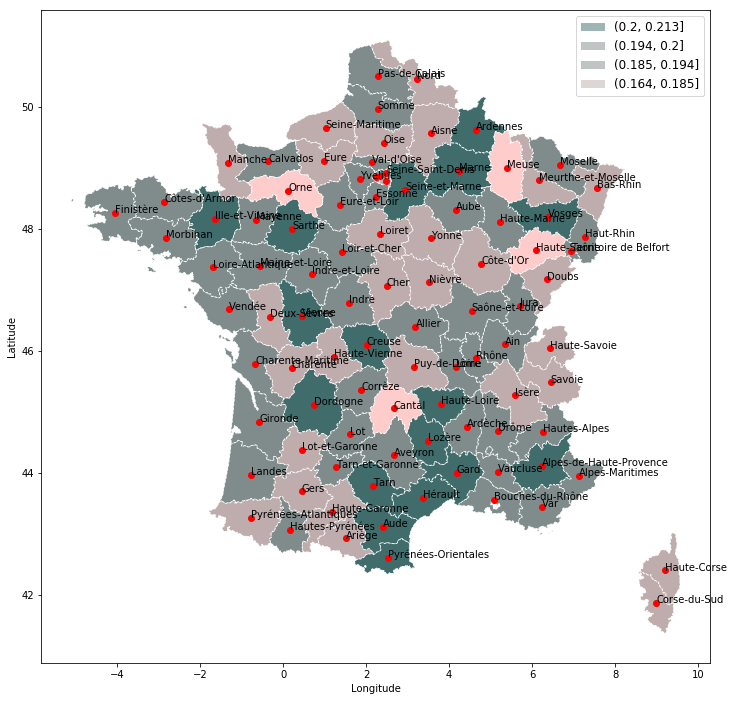

In [171]:
geojson_data=add_property(geojson_data=geojson_data,properties=properties,prop="perc_cit",k=4)
plot_map(geojson_data,"perc_cit",4)

In [126]:
geojson_data["features"][93]['properties']

{'code': '93',
 'nom': 'Seine-Saint-Denis',
 'Count_pourmil': 0.0,
 'Count_pourmil_leg': Interval(1.489, 2.878, closed='right')}